# Heart Disease Prediction using Machine Learning

This notebook demonstrates **EDA, preprocessing, model training, and prediction** for the **Heart Disease UCI dataset**.  
We will build and compare **Logistic Regression** and **Random Forest models**, and finally deploy a saved model to make predictions on new user data.

---


In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import joblib

##  Step 1: Load Dataset
We load the **Heart Disease UCI dataset** and explore its structure.

In [2]:
# Load dataset
df = pd.read_csv('./heart_disease_uci.csv')

In [3]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
df.columns.to_list()

['id',
 'age',
 'sex',
 'dataset',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'num']

In [6]:
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

## Step 2: Handle Missing Values (Numerical & Categorical)
- Fill missing **numerical columns** with mean values.  
- Categorical columns will be handled later.

In [7]:
# Identify numeric columns
numaric_cols = df.select_dtypes(include='number').columns

# Fill missing numeric values with mean
df[numaric_cols] = df[numaric_cols].fillna(df[numaric_cols].mean())

## Step 3: Exploratory Data Analysis (EDA)
We visualize:
- Distribution of numeric features  
- Correlation heatmap  

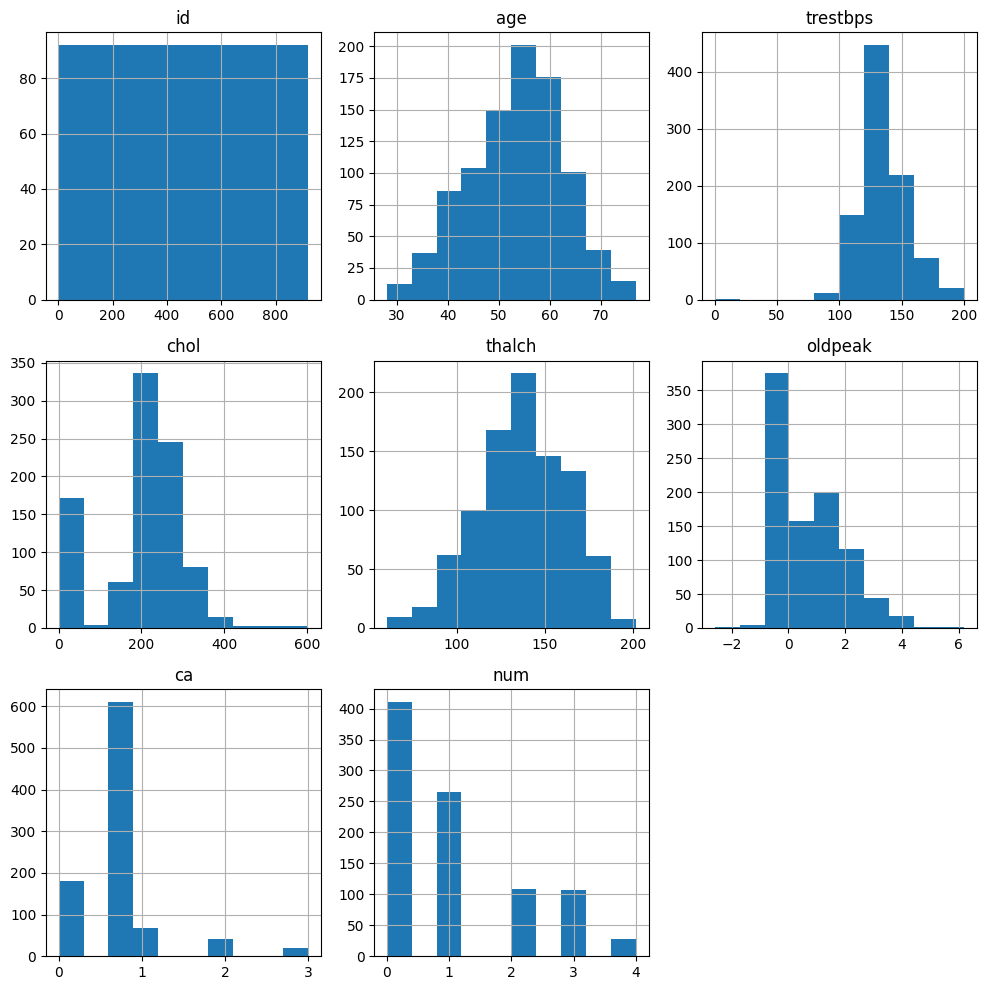

In [8]:
# Histogram for numeric columns
df[numaric_cols].hist(figsize=(10,10))
plt.tight_layout()
plt.show()

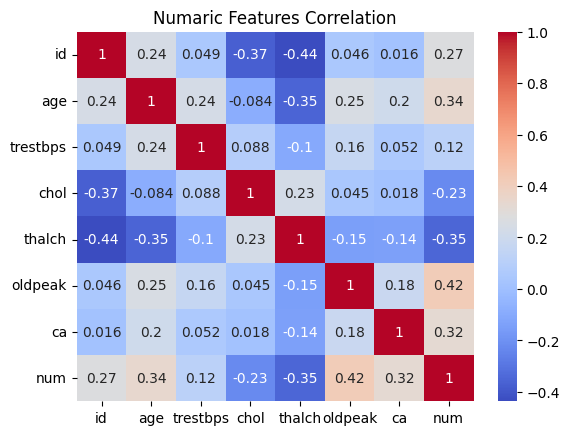

In [9]:
# Correlation heatmap
sns.heatmap(df[numaric_cols].corr(),annot=True, cmap='coolwarm')
plt.title('Numaric Features Correlation')
plt.show()

## Step 4: Handle Categorical Variables
- Encode categorical variables with `pd.get_dummies`.  
- Target column is **`num`**, which we binarize (`0 = No disease`, `1 = Disease`).  

In [10]:
# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns.to_list()

# Remove target if mistakenly included
if 'num' in cat_cols:
    cat_cols.remove('num')

In [11]:
# Features & Target
x = df.drop('num', axis=1)
y = (df['num'] > 0).astype(int) # Convert target into binary

In [12]:
# Encode categorical features
x = pd.get_dummies(x, columns=cat_cols, drop_first=True)
print("Final feature columns:")
x.columns.to_list()

Final feature columns:


['id',
 'age',
 'trestbps',
 'chol',
 'thalch',
 'oldpeak',
 'ca',
 'sex_Male',
 'dataset_Hungary',
 'dataset_Switzerland',
 'dataset_VA Long Beach',
 'cp_atypical angina',
 'cp_non-anginal',
 'cp_typical angina',
 'fbs_True',
 'restecg_normal',
 'restecg_st-t abnormality',
 'exang_True',
 'slope_flat',
 'slope_upsloping',
 'thal_normal',
 'thal_reversable defect']

## Step 5: Train-Test Split & Scaling
We split the dataset into **training (80%)** and **testing (20%)** and scale features using **StandardScaler**.  

In [13]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
# Standardize features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Step 6: Logistic Regression Model
We train a **Logistic Regression** classifier and evaluate accuracy, classification report, and confusion matrix.  

In [15]:
# Train Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [16]:
# Predictions
y_pred = lr.predict(x_test)

# Evaluation
print("Logistic Regression Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Model Accuracy: 0.8586956521739131
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.84        82
           1       0.85      0.90      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.86       184
weighted avg       0.86      0.86      0.86       184



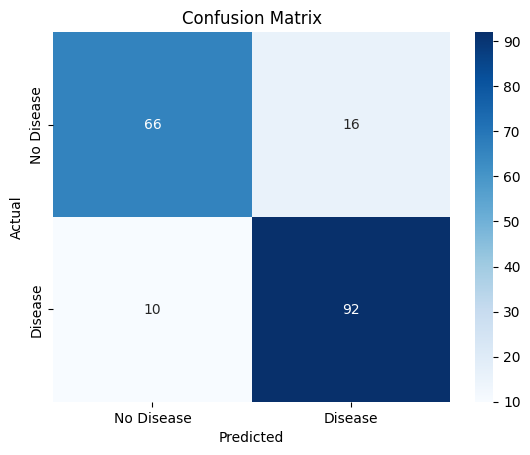

In [17]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.ylabel('Actual')    
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## Step 7: Random Forest Classifier
We also train a **Random Forest model** and check feature importances.  

In [18]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Predictions
y_pred_rf = rf.predict(x_test)

# Accuracy
print("Random Forest Model Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Model Accuracy: 0.8967391304347826


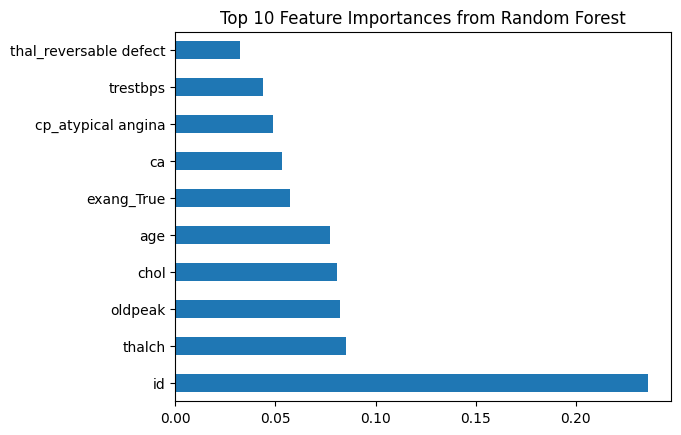

In [19]:
# Feature Importances
feat_importances = pd.Series(rf.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances from Random Forest')
plt.show()

## Step 8: Save Model and Scaler
We save the trained **Random Forest model** and **Scaler** for deployment.  

In [20]:
# Save model and scaler
joblib.dump(rf, "heart_rf_model.pkl")
joblib.dump(scaler, "heart_scaler.pkl")

['heart_scaler.pkl']

In [21]:
# Save a template input CSV
sample = x.head(1)
sample.to_csv("Heart_user_template.csv", index=False)
print("User template saved as 'Heart_user_template.csv")

User template saved as 'Heart_user_template.csv


## Step 9: Make Predictions on New User Data
We load a **new dataset (`heart_dataset.csv`)**, preprocess it, and make predictions using the trained model.  

In [22]:
# Load user dataset
user_df = pd.read_csv('./heart_dataset.csv')

# Identify column types
numeric_cols = df.select_dtypes(include= 'number').columns.tolist()
cat_cols = df.select_dtypes(include= 'object').columns.to_list()
bool_cols = df.select_dtypes(include= 'bool').columns.to_list()

# Ensure only existing columns are used
numaric_cols = [col for col in numaric_cols if col in user_df.columns]
cat_cols = [col for col in cat_cols if col in user_df.columns]
bool_cols = [col for col in bool_cols if col in user_df.columns]

# Fill missing values
user_df[numaric_cols] = user_df[numaric_cols].fillna(user_df[numaric_cols].mean())

for col in cat_cols:
    user_df[col] = user_df[col].fillna('Unknown')

for col in bool_cols:
    user_df[col] = user_df[col].astype(int)

# Encode categorical columns
user_df_encoded = pd.get_dummies(user_df, columns=cat_cols)

# Match training feature columns
user_df_encoded = user_df_encoded.reindex(columns=x.columns, fill_value= 0)

# Load scaler & model
scaler = joblib.load('heart_scaler.pkl')
user_df_scaler = scaler.transform(user_df_encoded)
model = joblib.load('heart_rf_model.pkl')

# Predictions
preds = model.predict(user_df_scaler)

# Add predictions to user data
user_df['Heart_Disease_Prediction'] = preds
print(user_df)

   age  trestbps  chol  fbs         restecg  thalch  exang  oldpeak  \
0   58       130   220    1          normal     150  False      1.4   
1   67       160   276    0  lv hypertrophy     108   True      1.5   
2   42       120   230    0          normal     170  False      1.0   
3   50       130   210    0  lv hypertrophy     158  False      0.8   
4   45       114   230    0          normal     165  False      1.1   

         slope  ca               thal  sex_Female  sex_Male  cp_asymptomatic  \
0         flat   0       fixed defect           0         1                0   
1         flat   3             normal           0         1                1   
2    upsloping   0  reversable defect           1         0                0   
3         flat   0             normal           0         1                0   
4  downsloping   0             normal           1         0                0   

   cp_atypical angina  cp_non-anginal  cp_typical angina  \
0                   0           

# Final Notes
- Logistic Regression is simple but interpretable.  
- Random Forest provides higher accuracy and feature importance insights.  
- The saved **model & scaler** allow real-world prediction on new patient data.  